In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from PIL import Image
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

In [47]:
from os import listdir
from os.path import isfile, join
files = [f for f in listdir("img") if isfile(join("img", f))]

In [48]:
files

['down_468865c7-5839-4cc6-aab7-1600eb4e508b_105.png',
 'down_468865c7-5839-4cc6-aab7-1600eb4e508b_106.png',
 'down_468865c7-5839-4cc6-aab7-1600eb4e508b_150.png',
 'down_468865c7-5839-4cc6-aab7-1600eb4e508b_151.png',
 'down_468865c7-5839-4cc6-aab7-1600eb4e508b_152.png',
 'down_468865c7-5839-4cc6-aab7-1600eb4e508b_222.png',
 'down_468865c7-5839-4cc6-aab7-1600eb4e508b_223.png',
 'down_468865c7-5839-4cc6-aab7-1600eb4e508b_224.png',
 'down_468865c7-5839-4cc6-aab7-1600eb4e508b_225.png',
 'down_468865c7-5839-4cc6-aab7-1600eb4e508b_237.png',
 'down_468865c7-5839-4cc6-aab7-1600eb4e508b_238.png',
 'down_468865c7-5839-4cc6-aab7-1600eb4e508b_239.png',
 'down_468865c7-5839-4cc6-aab7-1600eb4e508b_240.png',
 'down_468865c7-5839-4cc6-aab7-1600eb4e508b_251.png',
 'down_468865c7-5839-4cc6-aab7-1600eb4e508b_252.png',
 'down_468865c7-5839-4cc6-aab7-1600eb4e508b_253.png',
 'down_468865c7-5839-4cc6-aab7-1600eb4e508b_396.png',
 'down_468865c7-5839-4cc6-aab7-1600eb4e508b_397.png',
 'down_468865c7-5839-4cc6-aa

In [49]:
X = []
Y = []
width = 250
height = 100

In [50]:
from os import listdir
from os.path import isfile, join
files = [f for f in listdir("img") if isfile(join("img", f))]

In [51]:
for img in files:
    label = img.split("_")[0]
    im = np.array(Image.open("img/" + img).convert("L").resize((width, height)))
    im = im / 255
    X.append(im)
    Y.append(label)
    

In [52]:
import matplotlib.pyplot as plt

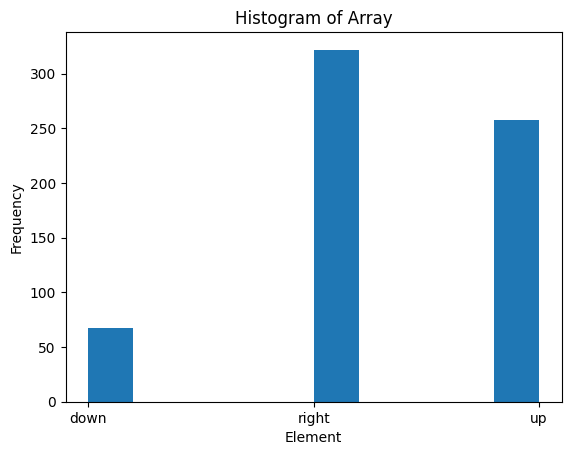

In [53]:
plt.hist(Y)
plt.xlabel('Element')
plt.ylabel('Frequency')
plt.title('Histogram of Array')
plt.show()

In [54]:
X = np.array(X)
X = X.reshape(X.shape[0], width, height, 1)

In [55]:
def onehot_labels(values):
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(values)
    onehot_encoder = OneHotEncoder(sparse_output = False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded),1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
    return onehot_encoded

In [56]:
Y

['down',
 'down',
 'down',
 'down',
 'down',
 'down',
 'down',
 'down',
 'down',
 'down',
 'down',
 'down',
 'down',
 'down',
 'down',
 'down',
 'down',
 'down',
 'down',
 'down',
 'down',
 'down',
 'down',
 'down',
 'down',
 'down',
 'down',
 'down',
 'down',
 'down',
 'down',
 'down',
 'down',
 'down',
 'down',
 'down',
 'down',
 'down',
 'down',
 'down',
 'down',
 'down',
 'down',
 'down',
 'down',
 'down',
 'down',
 'down',
 'down',
 'down',
 'down',
 'down',
 'down',
 'down',
 'down',
 'down',
 'down',
 'down',
 'down',
 'down',
 'down',
 'down',
 'down',
 'down',
 'down',
 'down',
 'down',
 'right',
 'right',
 'right',
 'right',
 'right',
 'right',
 'right',
 'right',
 'right',
 'right',
 'right',
 'right',
 'right',
 'right',
 'right',
 'right',
 'right',
 'right',
 'right',
 'right',
 'right',
 'right',
 'right',
 'right',
 'right',
 'right',
 'right',
 'right',
 'right',
 'right',
 'right',
 'right',
 'right',
 'right',
 'right',
 'right',
 'right',
 'right',
 'right',
 'right

In [57]:
Y = onehot_labels(Y)

In [59]:
train_X, test_X, train_y, test_y = train_test_split(X, Y , test_size = 0.25, random_state = 2)

In [60]:
model = Sequential()   
model.add(Conv2D(32, kernel_size = (3,3), activation = "relu", input_shape = (width, height, 1)))
model.add(Conv2D(64, kernel_size = (3,3), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.4))
model.add(Dense(3, activation = "softmax"))

In [61]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 248, 98, 32)       320       
                                                                 
 conv2d_5 (Conv2D)           (None, 246, 96, 64)       18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 123, 48, 64)      0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 123, 48, 64)       0         
                                                                 
 flatten_2 (Flatten)         (None, 377856)            0         
                                                                 
 dense_4 (Dense)             (None, 128)               48365696  
                                                      

In [62]:
model.compile(loss = "categorical_crossentropy", optimizer = "Adam", metrics = ["accuracy"])

model.fit(train_X, train_y, epochs = 35, batch_size = 64)

Epoch 1/35
8/8 [==============================] - 18s 2s/step - loss: 10.7402 - accuracy: 0.4289
Epoch 2/35
8/8 [==============================] - 17s 2s/step - loss: 0.7578 - accuracy: 0.6804
Epoch 3/35
8/8 [==============================] - 17s 2s/step - loss: 0.5108 - accuracy: 0.8247
Epoch 4/35
8/8 [==============================] - 18s 2s/step - loss: 0.4118 - accuracy: 0.8722
Epoch 5/35
8/8 [==============================] - 18s 2s/step - loss: 0.3220 - accuracy: 0.9113
Epoch 6/35
8/8 [==============================] - 18s 2s/step - loss: 0.2755 - accuracy: 0.9258
Epoch 7/35
8/8 [==============================] - 18s 2s/step - loss: 0.2765 - accuracy: 0.9237
Epoch 8/35
8/8 [==============================] - 17s 2s/step - loss: 0.2535 - accuracy: 0.9299
Epoch 9/35
8/8 [==============================] - 17s 2s/step - loss: 0.2360 - accuracy: 0.9381
Epoch 10/35
8/8 [==============================] - 16s 2s/step - loss: 0.2275 - accuracy: 0.9320
Epoch 11/35
8/8 [=====================

In [65]:
score_train = model.evaluate(train_X, train_y)
print("Train score: %",score_train[1]*100)    
    
score_test = model.evaluate(test_X, test_y)
print("Test score: %",score_test[1]*100)    

16/16 [==============================] - 3s 191ms/step - loss: 0.1339 - accuracy: 0.9526
Train score: % 95.2577292919159
6/6 [==============================] - 1s 167ms/step - loss: 0.3276 - accuracy: 0.9136
Test score: % 91.35802388191223


In [64]:
model.save("trex.h5")